<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 17**

## **Contenido**

- <a href="#cla"> Clasificación: </a><br>
  - <a href="#log"> Regresión logística</a><br>
    - <a href="#ent"> Entrenamiento</a><br>
    - <a href="#fro"> Fronteras de decisión</a><br>
    - <a href="#reg"> Regularización</a><br>
  - <a href="#sof"> Regresión logística multinomial (Softmax)</a><br> 






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

<p><a name="cla"></a></p>

# **Clasificación**

Identificamos un problema de clasificación cuando la variable objetivo es de naturaleza discreta. La clasificación a su vez se puede encontrar en múltiples formas:

* **Clasificación binaria**: La variable objetivo puede tomar dos posibles valores
* **Clasificación multinomial**: La variable objetivo puede tomar múltiples valores
* **Clasificación multietiqueta**: Se puede asociar cada instancia con múltiples clases.



<p><a name="log"></a></p>

# **Regresión logística**

En la regresión lineal, la salida es la suma ponderada de las entradas:


**Regresión lineal**

![](https://i.imgur.com/xYHeIRp.png)

La regresión logística es una regresión lineal generalizada en el sentido de que no generamos la suma ponderada de entradas directamente, sino que la pasamos a través de una función (función logística) 

**Regresión logística**

![](https://i.imgur.com/zqcYCeh.png)

**Función logística**

$$
\sigma (z) = \frac{1}{1 + \exp(-z)}
$$

![](https://i.imgur.com/pN7zDYo.png)



que puede asignar cualquier valor real entre 0 y 1, y que podemos utilizar para estimar la probabilidad de que una instancia pertenezca a una clase particular 

$$\hat p = \sigma(z) = \sigma(\mathbf{w}^T\mathbf{x})$$

Si la probabilidad estimada es mayor al 50 %, entonces el modelo predice que la instancia pertenece a la *clase positiva*. Si dicha probabilidad es menor al 50 %, el modelo predecirá que pertenece a la *clase negativa*. 

\begin{equation}
\hat y = 
\begin{cases}
 0 & si & \hat p < 0.5 \\
 1 & si & \hat p \geq 0.5\\
\end{cases}\end{equation}

Esto define un **clasificador binario**.


<p><a name="ent"></a></p>

## **Entrenamiento**

Ahora que vimos cómo utilizar el modelo de regresión logística para predecir probabilidades y etiquetas de clases, veamos cómo es el proceso de entrenamiento. Para esto, debemos definir el *likelihood* $L$ que queremos maximizar cuando construimos un modelo de regresión logística:

$$
L(\mathbf{w}) =  P(\mathbf{y} \mid \mathbf{x}; \mathbf{w}) = \prod^{n}_{i=1}\big[\sigma\big(z^{(i)}\big)\big]^{y^{(i)}} \big[1-\sigma\big(z^{(i)}\big)\big]^{1-y^{(i)}}
$$

En la práctica es más fácil maximizar el logaritmo del *likelihood* $l$:

$$
l(\mathbf{w}) = \sum^{n}_{i=1} y^{(i)} \log \big[\sigma\big(z^{(i)}\big)\big] + \big( 1 - y^{(i)}\big) \log \big[1-\sigma\big(z^{(i)}\big)\big]
$$

Una ventaja de tomar el logaritmo es evitar el desbordamiento numérico que puede ocurrir para *likelihoods* muy pequeñas. Otra ventaja es que convertimos la productoria en una sumatoria, de la cual podemos obtener la derivada más fácilmente.

Alternativamente, podemos reescribir $l$ como una función de costo que pueda ser minimizada:

$$
-l(\mathbf{w}) = \sum_{i=1}^{n} - y^{(i)} \log \big[ \sigma\big(z^{(i)}\big) \big] - \big(1 - y^{(i)}\big) \log\big[1-\sigma\big(z^{(i)}\big)\big]
$$

Para tener una mejor comprensión de esta función de costo, veamos el caso de una única instanca:

$$
j(\mathbf{w}) = - y \log \big( \sigma(z) \big) - \big(1 - y\big) \log\big(1-\sigma(z)\big)
$$

Examinando esta ecuación, vemos que el primer término se hace cero si $y=0$, mientras que el segundo término se anula si $y=1$

\begin{equation}
j(\mathbf{w}) = 
\begin{cases}
 - \log  \big(\sigma(z)\big)  & si & y = 1\\
 - \log\big(1-\sigma(z)\big) & si & y = 0\\
\end{cases}\end{equation}



![](https://i.imgur.com/q1jMyNX.png)

De la figura vemos que el costo se aproxima a cero si se predice correctamente que una instancia pertenece a la clase positiva ($y=1$). De forma similar, vemos que el costo también se aproxima a cero si se predice correctamente la clase negativa ($y=0$). Sin embargo, si la predicción es incorrecta, el costo tiende aumenta (en ambos casos): se penalizan las predicciones incorrectas con un costo cada vez mayor.

La función de costo sobre todo el conjunto de entrenamiento es simplemente el costo promedio de todas las instancias de entrenamiento:

* **Log-loss**


\begin{equation}
J(\mathbf{w}) = -\frac{1}{n} \sum_{i=1}^{n} \bigg\{ y^{(i)} \log \big[ \sigma\big(z^{(i)}\big) \big] + \big(1 - y^{(i)}\big) \log\big[1-\sigma\big(z^{(i)}\big)\big] \bigg\}
\end{equation}

No existe una solución cerrada en este caso, análoga a la ecuación normal. Sin embargo, podemos utilizar un algoritmo de optimización como el gradiente descendente.


<p><a name="fro"></a></p>

##  **Fronteras de decisión**

Para ilustrar la regresión logística utilicemos el conjunto de datos **Iris**. Este contiene información de longitud y ancho de 150 flores Iris de tres especies diferentes: Iris-Setosa, Iris-Versicolor, e Iris-Virginica:

![iris](https://i.imgur.com/kYu11vT.png)




In [ ]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

Para tener un problema de clasificación binaria, seleccionemos únicamente dos especies de flores y una sola característica *petal length*:

In [ ]:
data = iris.loc[iris.species != "setosa"]

X = data[["petal_length"]]
y = data["species"]

y.value_counts()

versicolor    50
virginica     50
Name: species, dtype: int64

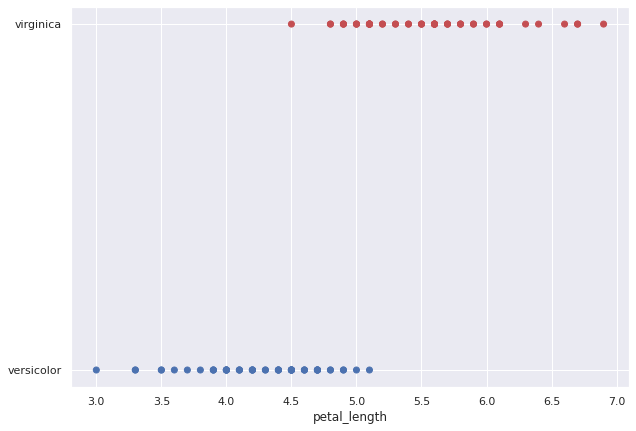

In [ ]:
color = ["r" if y == "virginica" else "b" for y in y]

plt.figure(figsize=(10,7))
plt.scatter(X, y, c=color)
plt.xlabel("petal_length");

Podríamos construir un modelo como estos utilizando `SGDClassifier`, especificando que la función de costo sea `log`:

In [ ]:
from sklearn.linear_model import SGDClassifier

lg_clf = SGDClassifier(loss="log")

Sin embargo, para minimizar una función de costo convexa como la *log-loss*, se recomienda utilizar algoritmos más avanzados que el descenso de gradiente estocástico (SGD). 

Sklearn ofrece muchos algoritmos de optimización adicionales `newton-cg`, `lbfgs`, `liblinear`, `sag`, y `saga`, que pueden ser especificados con el hiperparámetro `solver` para el estimador `LogisticRegression`.

Cada algoritmo de optimización tiene ventajas sobre los demás. Sklearn usa por defecto `lbfgs` ([limited-memory Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm](https://en.wikipedia.org/wiki/Limited-memory_BFGS)) como optimizador

In [ ]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = LogisticRegression().fit(X, y)

In [ ]:
# funcion de decisiton 
lr_clf.decision_function(X_test)

array([ 0.80417016,  2.5995836 ,  2.95866629, -2.42757405, -2.42757405,
       -3.14573943,  0.08600478,  4.39499705, -4.94115287, -0.6321606 ,
       -1.35032598, -3.8639048 ,  0.08600478,  0.80417016,  2.5995836 ,
       -0.99124329, -0.27307791,  0.08600478, -3.14573943, -4.22298749])

In [ ]:
# probabilidades
lr_clf.predict_proba(X_test)

array([[0.30913419, 0.69086581],
       [0.06916522, 0.93083478],
       [0.04932851, 0.95067149],
       [0.91890594, 0.08109406],
       [0.91890594, 0.08109406],
       [0.95874051, 0.04125949],
       [0.47851205, 0.52148795],
       [0.01218852, 0.98781148],
       [0.99290435, 0.00709565],
       [0.65297921, 0.34702079],
       [0.79418292, 0.20581708],
       [0.97944546, 0.02055454],
       [0.47851205, 0.52148795],
       [0.30913419, 0.69086581],
       [0.06916522, 0.93083478],
       [0.72933343, 0.27066657],
       [0.56784837, 0.43215163],
       [0.47851205, 0.52148795],
       [0.95874051, 0.04125949],
       [0.98555686, 0.01444314]])

In [ ]:
# prediccion de clase
lr_clf.predict(X_test)

array(['virginica', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

Grafiquemos las distribuciones de probabilidad

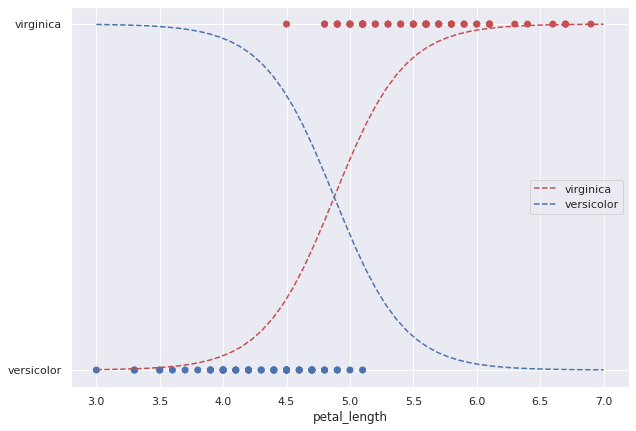

In [ ]:
x = np.c_[np.linspace(3,7)]
y_prob = lr_clf.predict_proba(x)

plt.figure(figsize=(10,7))
plt.scatter(X, y, c=color)
plt.plot(x, y_prob[:,1], "r--", label="virginica")
plt.plot(x, y_prob[:,0], "b--", label="versicolor")
plt.xlabel("petal_length")
plt.legend();

Para modelos lineales de regresión, la salida $\hat y$, es una función lineal de las características $X$: una línea, un plano o un hiperplano. Para modelos lineales de clasificación, es la *frontera de decisión* la que es una función lineal de las entradas. En otras palabras, un clasificador binario lineal es un clasificador que separa dos clases utilizando una línea, un plano o un hiperplano.

Podemos obtener la frontera de decisión a partir de la hipótesis de la regresión logística:

\begin{equation}
\hat p =
\begin{cases}
 >0.5 & si & \mathbf{w}^T\mathbf{x} \geq 0 \\
 <0.5 & si & \mathbf{w}^T\mathbf{x} <0\\
\end{cases}\end{equation}

En nuestro caso, la frontera de decisión está dada por: $$x_{fd} = -\frac{w_0}{w_1}$$




In [ ]:
w0 = lr_clf.intercept_
w1 = lr_clf.coef_

x_fd = -w0/w1
x_fd

array([[4.87604875]])

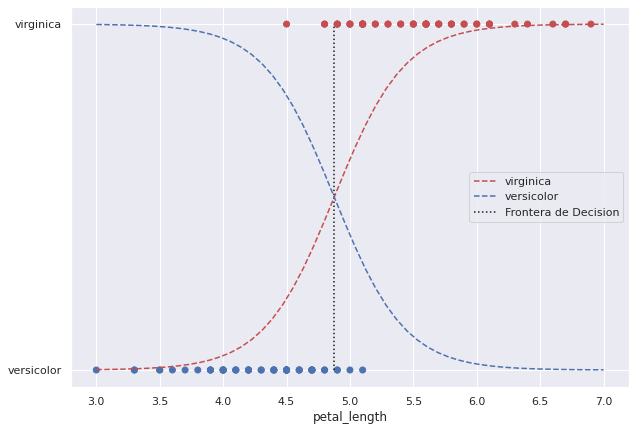

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X, y, c=color)
plt.plot(x, y_prob[:,1], "r--", label="virginica")
plt.plot(x, y_prob[:,0], "b--", label="versicolor")
plt.vlines(x_fd, 0, 1, linestyles=":", label="Frontera de Decision")
plt.xlabel("petal_length")
plt.legend();

In [ ]:
def plot_pr_tradeoff(treshold=0):

  np.random.seed(11)
  negative = np.random.randint(-12,2,size=12)
  positive = np.random.randint(-2,12,size=12)

  P = pd.Series(dict(zip(positive, positive)))
  N = pd.Series(dict(zip(negative, negative)))

  TP = len(P[P>=treshold])
  TN = len(N[N<treshold])

  FP = len(N[N>=treshold])
  FN = len(P[P<treshold])

  P = TP / (TP + FP)
  R = TP / (TP + FN)

  plt.figure(figsize=(10,7))
  plt.plot(negative, np.zeros(12)+0.001, "o", label="0")
  plt.plot(positive, np.zeros(12)-0.001, "o", label="1")
  plt.vlines(treshold, -0.04, 0.04, label="Treshold")
  plt.title(f"P = {P:.2f}\n R = {R:.2f}")
  plt.legend();

Hay una frontera de decisión alrededor de 4.87 cm donde ambas probabilidades son iguales al 50 %. Si la longitud del pétalo es mayor a 4.87 cm, el clasificador predecirá que la flor es una Iris-virginica.

Consideremos ahora dos características para hacer la clasificación

In [ ]:
X = data[["petal_length", "petal_width"]]
y = data["species"].replace({"versicolor":0, "virginica":1})

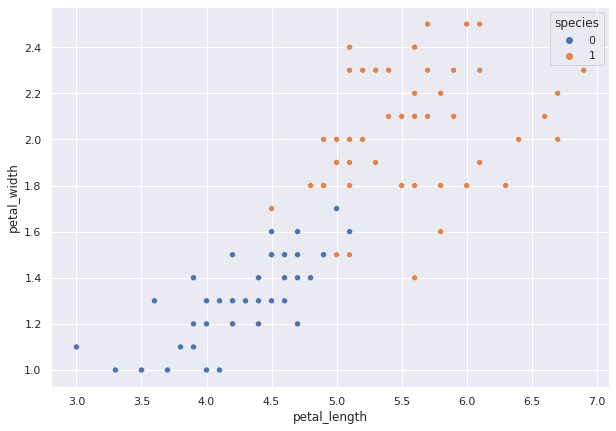

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=y);

De nuevo, construyamos un modelo de clasificación

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = LogisticRegression().fit(X_train, y_train)

En este caso la frontera de decisión estará dada por 

$$x_1 = -\frac{1}{w_1}\left( w_0 + w_2x_2\right) $$

Podemos utilizar la librería `mlxtend` para graficar las regiones de decisión con la función `plot_decision_regions`

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


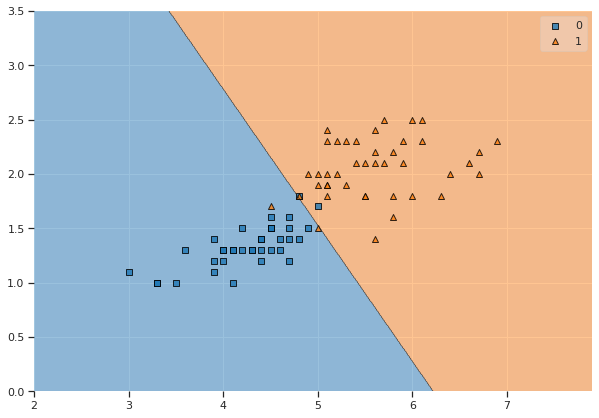

In [ ]:
import mlxtend.plotting as mlx

plt.figure(figsize=(10,7))
mlx.plot_decision_regions(X_train.values, y_train.values, lr_clf);

<p><a name="reg"></a></p>

## **Regularización**

La regresión logística aplica por defecto una regularización L2. El modelo no utiliza $\alpha$ directamente sino que utiliza el parámetro $C$ que es el inverso de $\alpha$: 

$$
C= \frac{1}{\alpha}
$$

Los valores de los parámetros se reducirán a medida que disminuya $C$, es decir, a medida que se aumente el nivel de regularización $\alpha$. Veamos cómo esto afecta la frontera de decisión:



In [ ]:
def FD(C):

  lr_clf = LogisticRegression(C=C).fit(X_train, y_train)

  print(f"train score: {lr_clf.score(X_train, y_train)}")
  print(f"test score: {lr_clf.score(X_test, y_test)}")

  plt.figure(figsize=(10,7))
  mlx.plot_decision_regions(X_train.values, y_train.values, lr_clf);

  plt.title(f"C: {C} \n W: {lr_clf.coef_[0].T}");

train score: 0.525
test score: 0.4


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


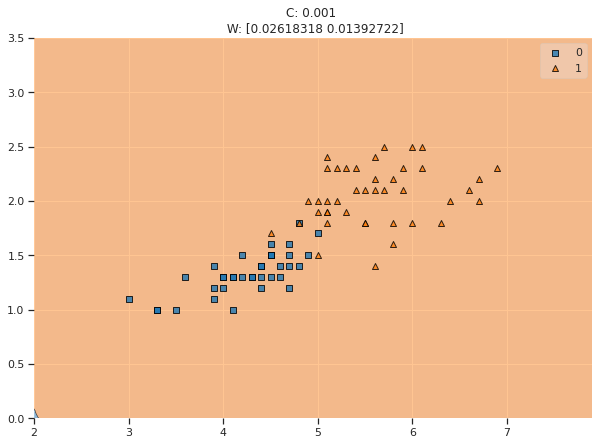

In [ ]:
FD(0.001)

train score: 0.95
test score: 0.95


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


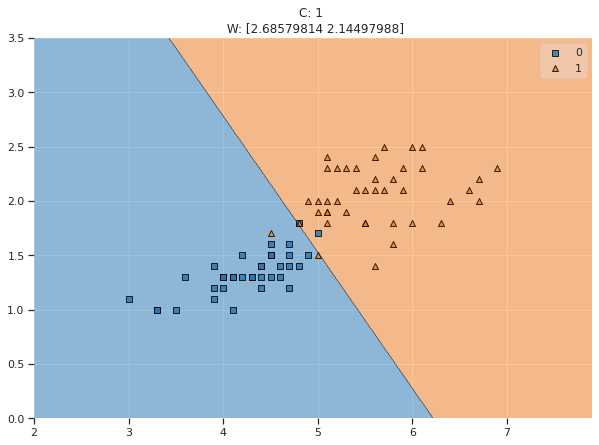

In [ ]:
FD(1)

Añadamos ahora la estandarización de los datos en el pipeline

In [ ]:
def StandarizedLR(**kwargs):
  return make_pipeline(StandardScaler(),
                       LogisticRegression(**kwargs))

In [ ]:
def FD(C):

  lr_clf = StandarizedLR(C=C).fit(X_train, y_train)

  print(f"train score: {lr_clf.score(X_train, y_train)}")
  print(f"test score: {lr_clf.score(X_test, y_test)}")

  plt.figure(figsize=(10,7))
  mlx.plot_decision_regions(X_train.values, y_train.values, lr_clf);

  plt.title(f"C: {C} \n W: {lr_clf['logisticregression'].coef_[0].T}");

train score: 0.575
test score: 0.45


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


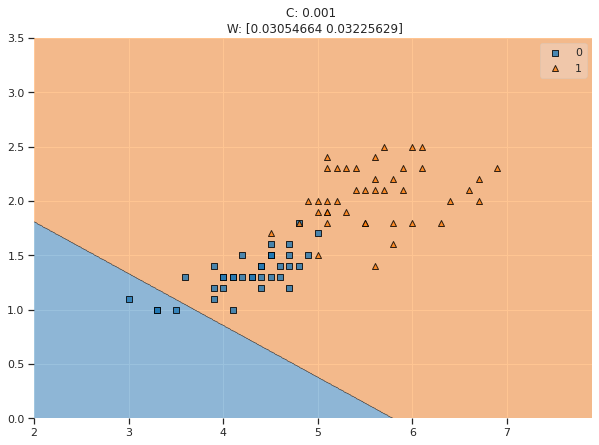

In [ ]:
FD(0.001)

train score: 0.95
test score: 0.9


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


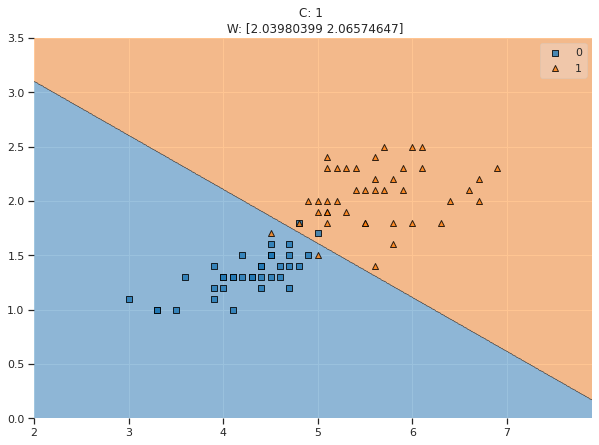

In [ ]:
FD(1)

Debemos tener en cuenta que este modelo es lineal, por lo que no funcionará muy bien para datos que no son separables linealmente, algo análogo a lo que pasaba con la regresión lineal cuando las características no tenían relaciones lineales.

**Ejercicio:** Entrene un modelo de regresión logistica para el siguiente conjunto de datos y obtenga la frontera de decisión. Luego, incluya una transformación polinómica (`PolynomialFeatures`) en el pipeline y repita el procedimiento.

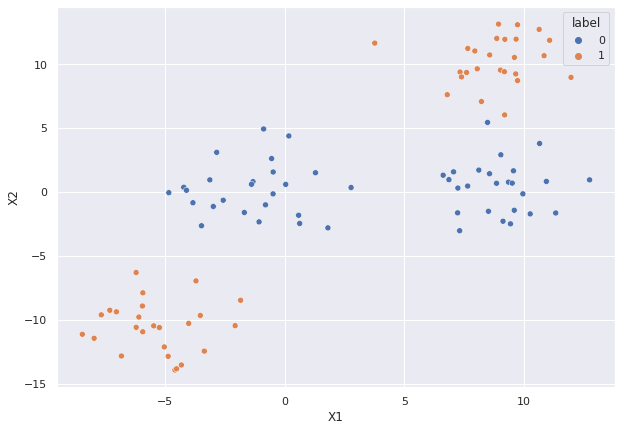

In [ ]:
from sklearn.datasets import make_blobs

# Generación de un dataset de clasificación 2d de nubes de puntos.
n_samples = 100
centers = [(-5,-10),(9,10),(-1,0),(9,0)]

X, y = make_blobs(n_samples=n_samples, centers=centers, n_features=2, cluster_std=2, random_state=42)

y = np.array([1 if label==0 or label==1 else 0 for label in y])

df = pd.DataFrame(dict(X1=X[:,0], X2=X[:,1], label=y))

plt.figure(figsize=(10,7))
sns.scatterplot(data=df, x="X1", y="X2", hue="label");

<p><a name="sof"></a></p>

# **Regresión logística multinomial (Regresión Softmax)**

Mientras que los clasificadores binarios distinguen entre dos clases, los clasificadores multiclase (también llamados clasificadores multinomiales) pueden distinguir entre más de dos clases. 

Algunos algoritmos son capaces de manejar varias clases directamente. Otros son clasificadores estrictamente binarios. Sin embargo, existen varias estrategias que se pueden utilizar para realizar una clasificación multiclase utilizando varios clasificadores binarios:

 * OVA (one vs all)
 * OVO (one vs one)

El modelo de regresión logística se puede generalizar para admitir varias clases directamente, sin tener que entrenar y combinar varios clasificadores binarios. Este se conoce como Regresión logística multinomial o Regresión Softmax

La idea es simple: dada una instancia $x$, la regresión Softmax comienza calculando un puntaje $s_k(\mathbf{x})$ para cada clase $k$






$$s_k(\mathbf{x}) = \mathbf{w}_k^{T} \mathbf{x}$$



Note que cada clase tiene su propio vector de parámetros $\mathbf{w}_k$. Una vez se han calculado los puntajes de cada clase para la instancia, se puede estimar la probabilidad $p_k$ de que la instancia pertenezca a la clase $k$ pasando el puntaje a la *función softmax*:



$$
\hat p_k = \sigma_{\text{soft}} (s_k) = \frac{\exp(s_k)}{\sum_j^{k} \exp(s_k)}
$$


Al igual que la regresión logística, la regresión Softmax predice la clase con la probabilidad estimada más grande, que es simplemente la clase con el puntaje más alto:



$$
\hat y = \underset{k}{\text{argmax}} \: \big(\sigma_{\text{soft}} (s_k)\big)
$$




Ahora que sabemos cómo el modelo estima las probabilidades y hace las predicciones, veámos cómo es el entrenamiento: El objetivo es tener un modelo que estime una alta probabilidad para la clase objetivo (y consecuentemente una baja probabilidad para las otras clases). 

La siguiente función de costo, conocida como **entropia cruzada**, 




$$
J(\mathbf{w}) = -\frac{1}{n} \sum_{i=1}^{n} \sum_{k} y_k^{i} \log(\hat p_k^i)
$$

logrará dicho objetivo dado que penaliza el modelo cuando este estima una baja probabilidad para la clase objetivo. Note que esta función de costo se reduce a la función de costo *log-loss* cuando $k=2$.

![](https://i.imgur.com/cgPUFjB.png)

Construyamos el modelo de clasificación multinomial:

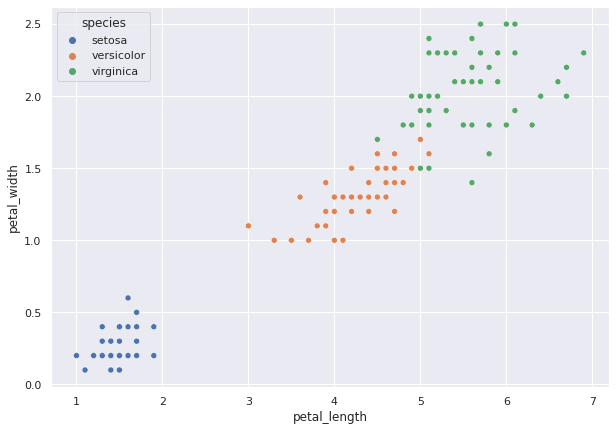

In [ ]:
# seleccionamos las tres características
X = iris[["petal_length", "petal_width"]]
y = iris["species"].map({"setosa":0, "virginica":1, "versicolor":2})

plt.figure(figsize=(10,7))
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species");

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_clf = make_pipeline(StandardScaler(), 
                      LogisticRegression(multi_class="multinomial")).fit(X_train, y_train)

In [ ]:
# funcion de decision
lr_clf.decision_function(X_test)

array([[-1.95375128e+00, -6.18960554e-03,  1.95994089e+00],
       [ 4.78807580e+00, -6.99231004e+00,  2.20423424e+00],
       [-8.16171476e+00,  6.59786481e+00,  1.56384994e+00],
       [-2.53844273e+00,  7.39714021e-01,  1.79872871e+00],
       [-2.66682585e+00,  7.98846765e-01,  1.86797909e+00],
       [ 4.77791024e+00, -6.91954252e+00,  2.14163228e+00],
       [-7.16978667e-01, -1.12052447e+00,  1.83750314e+00],
       [-5.66783839e+00,  4.22366003e+00,  1.44417836e+00],
       [-2.53844273e+00,  7.39714021e-01,  1.79872871e+00],
       [-8.45361787e-01, -1.06139173e+00,  1.90675352e+00],
       [-4.80604956e+00,  3.21395588e+00,  1.59209369e+00],
       [ 5.77824775e+00, -8.06114694e+00,  2.28289919e+00],
       [ 5.62953349e+00, -7.85647915e+00,  2.22694566e+00],
       [ 5.63969906e+00, -7.92924668e+00,  2.28954762e+00],
       [ 5.06517318e+00, -7.25611057e+00,  2.19093739e+00],
       [-3.10280305e+00,  1.34008260e+00,  1.76272045e+00],
       [-6.35041626e+00,  4.81039384e+00

In [ ]:
# probabilidades
lr_clf.predict_proba(X_test)

array([[1.72131562e-02, 1.20691254e-01, 8.62095590e-01],
       [9.29807766e-01, 7.11601086e-06, 7.01851181e-02],
       [3.86524164e-07, 9.93529145e-01, 6.47046858e-03],
       [9.61374781e-03, 2.55022275e-01, 7.35363978e-01],
       [7.92372257e-03, 2.53543076e-01, 7.38533201e-01],
       [9.33152945e-01, 7.75914106e-06, 6.68392955e-02],
       [6.88109110e-02, 4.59620712e-02, 8.85227018e-01],
       [4.76433958e-05, 9.41512070e-01, 5.84402865e-02],
       [9.61374781e-03, 2.55022275e-01, 7.35363978e-01],
       [5.72034373e-02, 4.60894488e-02, 8.96707114e-01],
       [2.74504880e-04, 8.34822563e-01, 1.64902933e-01],
       [9.70554212e-01, 9.47648003e-07, 2.94448407e-02],
       [9.67784011e-01, 1.34548099e-06, 3.22146431e-02],
       [9.66108600e-01, 1.23625394e-06, 3.38901634e-02],
       [9.46554032e-01, 4.21774062e-06, 5.34417499e-02],
       [4.63480592e-03, 3.94050857e-01, 6.01314337e-01],
       [1.37000349e-05, 9.63385072e-01, 3.66012275e-02],
       [7.25270216e-02, 3.13150

In [ ]:
# predicciones
lr_clf.predict(X_test)

array([2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 2, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0])

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


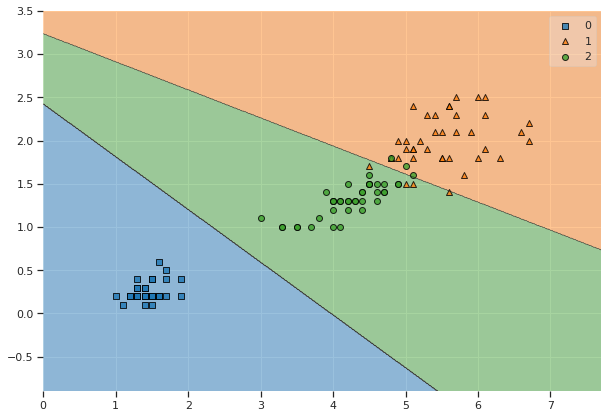

In [ ]:
# regiones de decision
plt.figure(figsize=(10,7))
mlx.plot_decision_regions(X_train.values, y_train.values, lr_clf);